K-Nearest Neighbors (KNN) is a non-parametric, supervised machine learning algorithm used for both classification and regression tasks.
It is considered a "lazy" algorithm because it does not explicitly learn a model during the training phase. 
Instead, it memorizes the entire training dataset and performs computations only when a prediction is requested. 
Prediction:
For Classification: The new data point is assigned to the class that is most frequent among its 'k' nearest neighbors (majority vote).
For Regression: The predicted value for the new data point is typically the average or median of the target values of its 'k' nearest neighbors.
Advantages of KNN:
Simple to understand and implement.
Effective for datasets with complex decision boundaries.
No need for explicit training phase (lazy learning).
Disadvantages of KNN:
Computationally expensive for large datasets, especially during prediction, as it needs to calculate distances to all training points.
High memory usage as it stores the entire training dataset.
Sensitive to the scale of features and irrelevant features. Feature scaling is often necessary.
Can be affected by imbalanced datasets.



In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Features: [Weight, Color Score]
X = np.array([
    [150, 0.8],
    [170, 0.75],
    [140, 0.82],
    [130, 0.7],
    [160, 0.65],
    [120, 0.6]
])

# Labels
y = np.array(['Apple', 'Apple', 'Apple', 'Orange', 'Orange', 'Orange'])

# Create KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X, y)

# New fruit to classify
new_fruit = np.array([[155, 0.72]])

# Predict the class
prediction = knn.predict(new_fruit)
print(f"The new fruit is classified as: {prediction[0]}")


The new fruit is classified as: Apple


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

X = np.array([[150, 0.8], [170, 0.75], [140, 0.82], [130, 0.7], [160, 0.65], [120, 0.6]])
y = np.array(['Apple', 'Apple', 'Apple', 'Orange', 'Orange', 'Orange'])

k_range = range(1, 5)  # Max K = 4 because of fold size

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=3, scoring='accuracy').mean()
    scores.append(score)

print(scores)



[np.float64(0.8333333333333334), np.float64(0.5), np.float64(0.6666666666666666), np.float64(0.5)]


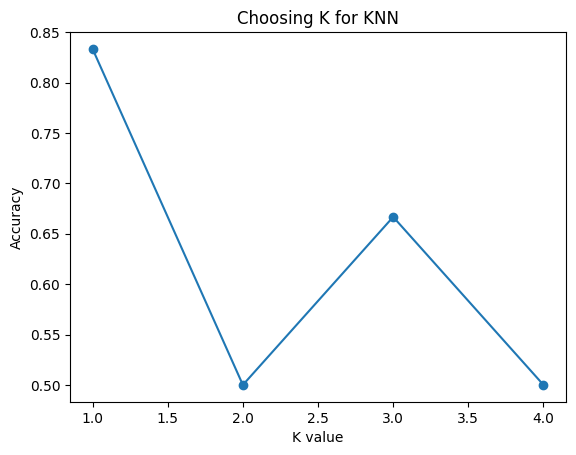

In [2]:
import matplotlib.pyplot as plt

plt.plot(k_range, scores, marker='o')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('Choosing K for KNN')
plt.show()


In [3]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


In [5]:
 #Features and labels
X = [
    [1.4, 0.2],
    [1.5, 0.3],
    [4.7, 1.4],
    [4.5, 1.5],
    [5.1, 1.8],
    [5.3, 1.9]
]

y = ['Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica']

# Create and train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# New flower to classify
new_flower = [[4.8, 1.6]]
prediction = knn.predict(new_flower)

print(f"The new flower is classified as: {prediction[0]}")


The new flower is classified as: Versicolor


We classify a new flower with petal length 4.8 and width 1.6. The model checks the 3 nearest known flowers. Majority class among them decides the predicted flower type.

